In [7]:
import pandas as pd

gold_labels = pd.read_excel('/home/abdelrahman.sadallah/mbzuai/review_rewrite/chatgpt/outputs/gold_aspects_results.xlsx', sheet_name=None)
aspects = [ 'actionability', 'grounding_specificity', 'verifiability', 'helpfulness']

batch_0_labels = pd.read_excel('../outputs/main_data_batch_0_results.xlsx', sheet_name=None)

human_labels_counts = {}
chatgpt_gold_labels_counts = {}
chatgpt_1k_counts = {}

for aspect in aspects:
    human_labels_counts[aspect] = gold_labels[aspect][f'{aspect}_label'].value_counts()
    chatgpt_gold_labels_counts[aspect] = gold_labels[aspect][f'chatgpt_{aspect}_definitions_incontext_learning_score'].value_counts()
    ## sample number of labels as the same as the number of labels in the gold labels
    chatgpt_1k_counts[aspect]  = batch_0_labels[aspect][f'chatgpt_{aspect}_score']
    num_labels = len(gold_labels[aspect][f'{aspect}_label'])
    chatgpt_1k_counts[aspect] = chatgpt_1k_counts[aspect].sample(n=num_labels)
    chatgpt_1k_counts[aspect]  = chatgpt_1k_counts[aspect].value_counts()


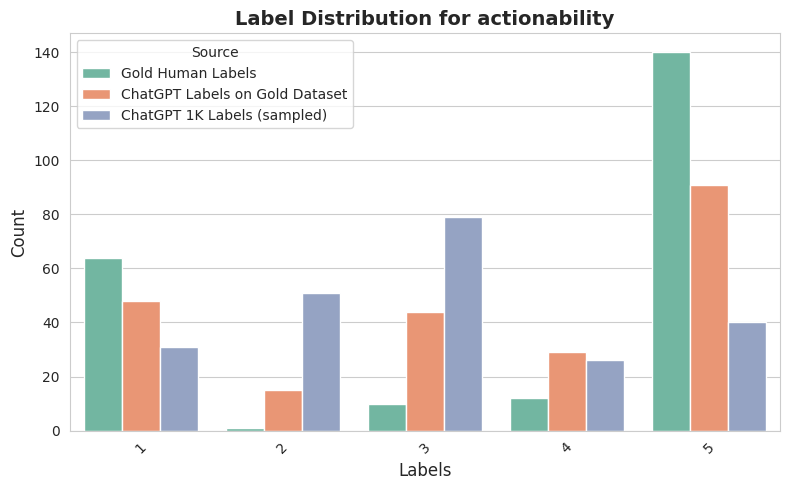

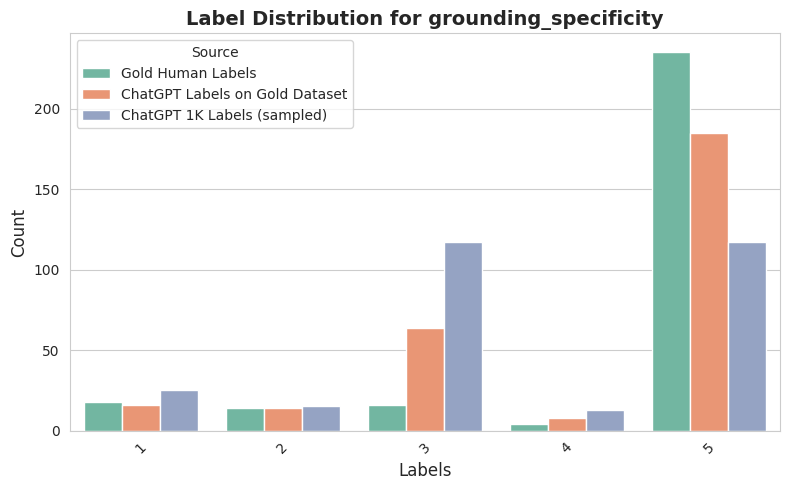

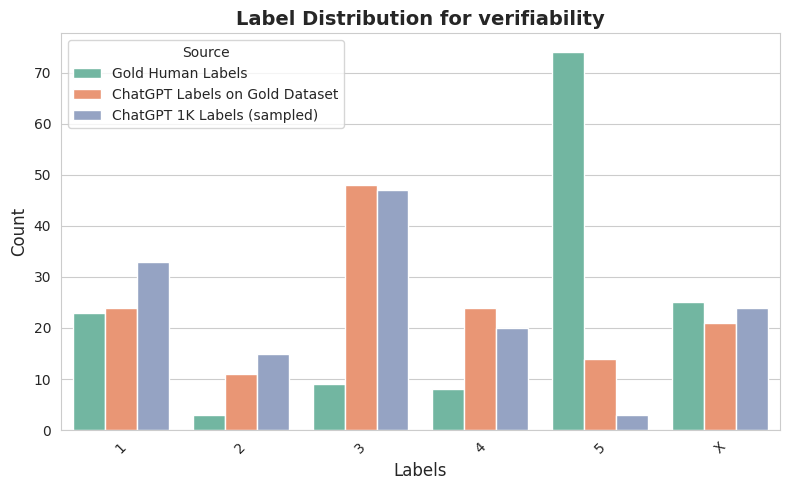

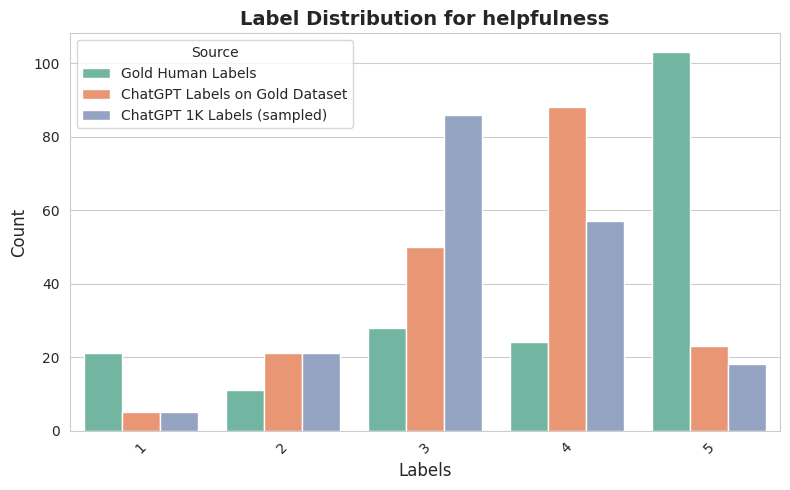

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_style("whitegrid")  # Set a clean style for better readability

for aspect in aspects:
    # Combine all data into a single DataFrame for easier plotting
    df = pd.DataFrame({
        "Gold Human Labels": human_labels_counts[aspect],
        "ChatGPT Labels on Gold Dataset": chatgpt_gold_labels_counts[aspect],
        "ChatGPT 1K Labels (sampled)": chatgpt_1k_counts[aspect]
    }).stack().reset_index()

    df.columns = ["Label", "Source", "Count"]  # Rename columns for clarity

    # Create the plot
    plt.figure(figsize=(8, 5))
    sns.barplot(data=df, x="Label", y="Count", hue="Source", palette="Set2")

    # Formatting
    plt.title(f"Label Distribution for {aspect}", fontsize=14, fontweight='bold')
    plt.xlabel("Labels", fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(rotation=45)  # Rotate labels for better readability
    plt.legend(title="Source")  # Add legend for clarity
    plt.tight_layout()

    plt.show()
